<a href="https://colab.research.google.com/github/Sreelekshmim123/Supervisedlearningalgorithm/blob/main/Linearregressionoftip_amount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import neccessary libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving tip-amount (1).xlsx to tip-amount (1).xlsx


Load the data and dispaly first five rows

In [4]:
data=pd.read_excel('/content/tip-amount (1).xlsx')
data.head()

,Meal,Observed total bill(xi),Observed tip amount(yi)
0,1,34,5
1,2,108,17
2,3,64,11
3,4,88,8
4,5,99,14


Explore the data

In [5]:
data.describe()#summary of statstics

,Meal,Observed total bill(xi),Observed tip amount(yi)
count,6.000000,6.000000,6.000000
mean,3.500000,74.000000,10.000000
std,1.870829,29.003448,4.898979
min,1.000000,34.000000,5.000000
25%,2.250000,54.250000,5.750000
50%,3.500000,76.000000,9.500000
75%,4.750000,96.250000,13.250000
max,6.000000,108.000000,17.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Meal                     6 non-null      int64
 1   Observed total bill(xi)  6 non-null      int64
 2   Observed tip amount(yi)  6 non-null      int64
dtypes: int64(3)
memory usage: 272.0 bytes


In [7]:
data.isna().sum()

Meal                       0
Observed total bill(xi)    0
Observed tip amount(yi)    0
dtype: int64

Select variable as independent variable and dependent variable

In [8]:
x=data[['Observed total bill(xi)']]#independent variable
y=data[['Observed tip amount(yi)']]#dependent variable

In [9]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [10]:
#fit linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred=model.predict(x_test)

In [13]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("r2 score :",r2_score(y_test,y_pred))
print("mean squared :",mean_absolute_error(y_test,y_pred))
print("mean absolute error :",mean_squared_error(y_test,y_pred))

r2 score : 0.8291178380635313
mean squared : 2.0621096460791115
mean absolute error : 6.151757829712871


Interpret the result

In [14]:
print("intercept ",model.intercept_)

intercept  [0.06904927]


In [15]:
print("coefficient ",model.coef_)

coefficient  [[0.12491325]]


Make prediction

In [16]:
data.head()

,Meal,Observed total bill(xi),Observed tip amount(yi)
0,1,34,5
1,2,108,17
2,3,64,11
3,4,88,8
4,5,99,14


In [22]:
newdata=[[34]]
newpred=model.predict(newdata)
print("Observed tip amount is  :",newpred)

Observed tip amount is  : [[4.31609993]]


Visualization

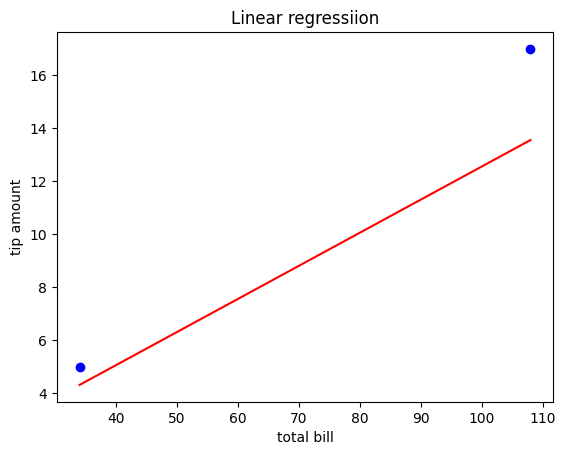

In [23]:
plt.scatter(x_test,y_test,c='blue')
plt.plot(x_test,y_pred,c='red')
plt.xlabel('total bill')
plt.ylabel('tip amount')
plt.title("Linear regressiion")
plt.show()